# Workflow

1. Get data into tensors
2. Build or pick a pretrained model
    - 2.1 Pick a loss function and optimizer
    - 2.2 Build training loop
3. fit the model and make prediction
4. Evaluate the model
5. Improve through implementation
6. Save and reload the model

In [1]:
import torch
from torch import nn 
import matplotlib.pyplot as plt

torch.__version__

'2.0.1+cpu'

# Data

In [2]:
# Create *known* parameters
weight = 0.7
bias = 0.3


# Create
start = 0
end = 1
step = 0.02

X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias

X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [3]:
train_split = int(0.8 * len(X))

X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split : ], y[train_split :]

X_train.shape, y_train.shape , X_test.shape, y_test.shape

(torch.Size([40, 1]),
 torch.Size([40, 1]),
 torch.Size([10, 1]),
 torch.Size([10, 1]))

In [4]:
# Visualization

def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
    """
    Plots training data and compares predictions
    """

    plt.figure(figsize=(7,7))
    plt.scatter(train_data,train_labels,c='b',s=4,label="Training data")
    plt.scatter(test_data,test_labels,c='g',s=4,label="Testing data")

    if predictions is not None:
        plt.scatter(test_data,predictions,c='r',s=4,label="Predictions")
    
    plt.legend(prop={'size':14})
    plt.show();

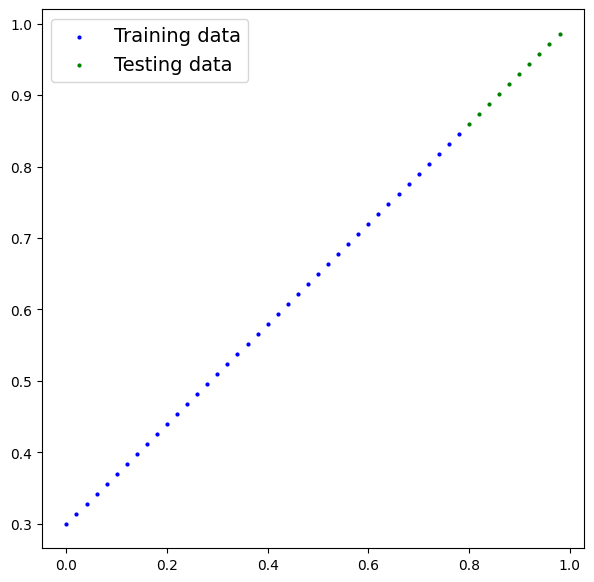

In [5]:
plot_predictions()

# Model Definition

In [6]:
# Build LR in pytorch

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()

        # Initialize model parameters
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float))
        
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))
    
    # Define Computation of the model
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights* x + self.bias

In [7]:
torch.manual_seed(42)

# Creating instance
model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [8]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [9]:
## Making prediction using 'torch.inference_mode()'

with torch.inference_mode():
    y_preds = model_0(X_test)

# with torch.no_grad(): # does similar stuff but prefer to use inference mode
#     y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

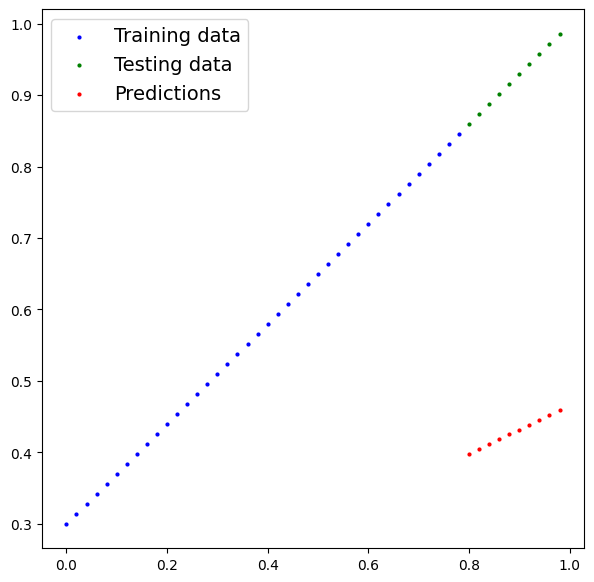

In [10]:
plot_predictions(predictions=y_preds)

## Train the model

**How does model learn?**
- Gradient Descent Algorithm
- Backpropagation Algorithm

- **Loss Function**: A function to measure how wrong your model's predictions are to the idead outputs
- **Optimizer** Takes into account the loss of a model and adjust the model parameters to improve the loss function

In [11]:

# Step a loss function
loss_fn = nn.L1Loss()

# Step up an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr = 0.01)


# Building a Training Loop in Python

- loop through data 
- forward pass 
- cal the loss 
- optimize grad 
- loss backward 
- optimizer step 


In [12]:
# Epoch is one loop through data
epochs = 200
preds = []

for epoch in range(epochs):
    # set the model in training mode
    model_0.train()

    # Forward pass
    y_pred = model_0(X_train)

    # Cal the loss
    loss = loss_fn(y_pred,y_train)
    # print(loss)

    # optimizer
    optimizer.zero_grad()

    # Perform backpropagation on the loss with respect to the paramters of the model()
    loss.backward()

    # Step optimizer
    optimizer.step()


    ## Testing
    model_0.eval() # turns off different settings in the model not needed for evaluation/testing
    with torch.inference_mode(): #turns off gradient tracking
        test_pred = model_0(X_test)
        preds.append([y_pred.detach().numpy(),test_pred,epoch])
        test_loss = loss_fn(test_pred,y_test)
    
    if epoch%10==0:
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
        print(model_0.state_dict())


Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

In [13]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

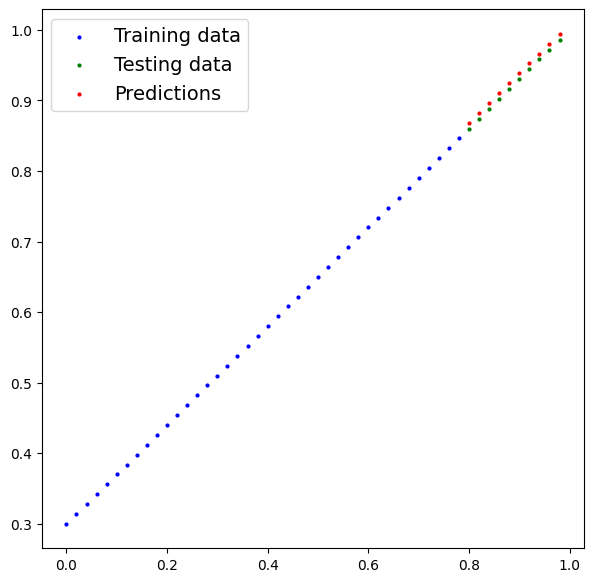

In [14]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

plot_predictions(predictions=y_preds_new)

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [16]:

# fig,ax = plt.subplots()



# def f( frames ):
#     """
#     Plots training data and compares predictions
#     """
#     ax.clear()
#     ax.scatter(X_train,y_train,c='b',s=4,label="Training data")
#     ax.scatter(X_train,frames[0],c='r',s=4,label="Train Pred")
#     ax.scatter(X_test,y_test,c='g',s=4,label="Testing data")
#     ax.scatter(X_test,frames[1],c='r',s=4,label="Test Predict")
    
#     ax.legend(prop={'size':14})
#     ax.set_title(f"Epoch : {frames[2]}")
    
#     return ax,


# ani = FuncAnimation(fig, f, frames=preds,interval=50)
# ani.save('LR_with_epoch.gif', writer='imagemagick', fps=50)

# Saving the Pytorch model

- torch.save() - python pickle format 
-  torch.load() - allows you to load a saved pytorch object
- torch.nn.Module.load_state_dict() - allows to load a model saved state dictionary

In [21]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)


MODEL_NAME = "01_pytorch_model_0.pth"  #.pt or .pth
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(model_0.state_dict(),MODEL_SAVE_PATH)

# Load the Pytorch model

In [23]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [24]:
# To loas in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [25]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

# Building a PyTorch Linear Model

Using nn.Module layer

In [27]:
class LinearRegressionModelV2(nn.Module):

    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)
        
    
    def forward(self, x: torch.Tensor)-> torch.Tensor:
        return self.linear_layer(x)


torch.manual_seed(0)
model_1 = LinearRegressionModelV2()
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[-0.0075]])),
             ('linear_layer.bias', tensor([0.5364]))])

In [28]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [29]:
# Training Loop
torch.manual_seed(0)

epochs = 200
preds = []
history = []

for epoch in range(epochs):

    model_1.train()  #initialise train mode

    y_pred = model_1(X_train) # forward pass

    loss = loss_fn(y_pred,y_train) # cal the loss

    optimizer.zero_grad() # initialise the optim grad

    loss.backward() # backward pass

    optimizer.step() # take the optimizer step

    ### Testing
    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)
        preds.append([y_pred.detach().numpy(), test_pred, epoch])

        test_loss = loss_fn(test_pred, y_test)
        history.append([loss.detach().numpy(), test_loss, epoch])
    






In [30]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.3549]])),
             ('linear_layer.bias', tensor([0.4449]))])

MovieWriter imagemagick unavailable; using Pillow instead.


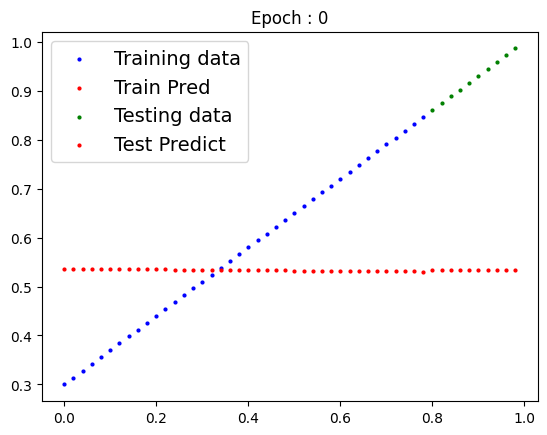

In [31]:

fig,ax = plt.subplots()



def f( frames ):
    """
    Plots training data and compares predictions
    """
    ax.clear()
    ax.scatter(X_train,y_train,c='b',s=4,label="Training data")
    ax.scatter(X_train,frames[0],c='r',s=4,label="Train Pred")
    ax.scatter(X_test,y_test,c='g',s=4,label="Testing data")
    ax.scatter(X_test,frames[1],c='r',s=4,label="Test Predict")
    
    ax.legend(prop={'size':14})
    ax.set_title(f"Epoch : {frames[2]}")
    
    return ax,


ani = FuncAnimation(fig, f, frames=preds,interval=50)
ani.save('LR2.gif', writer='imagemagick', fps=50)

In [64]:
history = np.array(history)

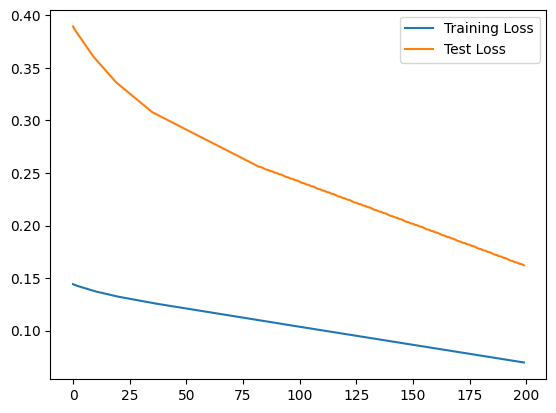

In [72]:
plt.plot(history[:,2],history[:,0],label="Training Loss")
plt.plot(history[:,2],history[:,1],label="Test Loss")
plt.legend()

In [77]:
# saving V2
MODEL_SAVE_PATH = MODEL_PATH / "01_pytorch_linear_modelv2.pth"

In [78]:
torch.save(model_1.state_dict,MODEL_SAVE_PATH)

# Exercises

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import torch

In [54]:
X = torch.arange(1,1000).unsqueeze(dim=1)
X = X.to(torch.float32)
weight = 0.3
bias = 0.9
y = weight * X + bias

# plt.plot(X,y)

In [55]:
train_split = int(0.8*len(X))

X_train,y_train = X[:train_split],y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train),len(X_test),len(y_train),len(y_test)

(799, 200, 799, 200)

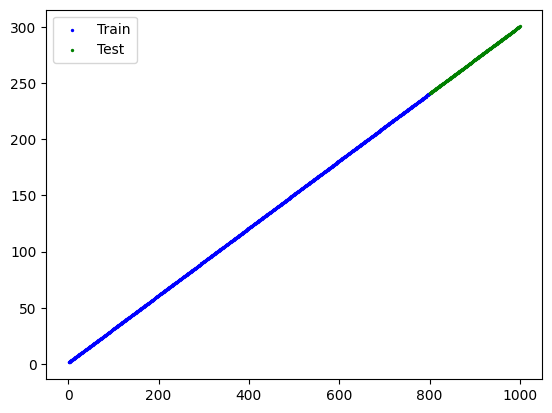

In [56]:
plt.scatter(X_train,y_train,s=2,c='b',label="Train")
plt.scatter(X_test,y_test,s=2,c='g',label='Test')
plt.legend()

In [57]:
from torch import nn

In [72]:
# Define model

class LR(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1,
                                    out_features=1)
    

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

# Class Instance
torch.manual_seed(0)
linear_model = LR()

linear_model.state_dict()


OrderedDict([('linear_layer.weight', tensor([[-0.0075]])),
             ('linear_layer.bias', tensor([0.5364]))])

In [62]:
# Defining Loss and Optimizer

loss_fn = nn.L1Loss()

optimizer = torch.optim.Adam(params=linear_model.parameters(),
                             lr = 0.1)

In [63]:
# Writing the training Loop

epochs = 200
preds = []

for epoch in range(epochs):

    linear_model.train()

    y_pred = linear_model(X_train)

    loss = loss_fn(y_pred,y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    linear_model.eval()

    with torch.inference_mode():
        test_pred = linear_model(X_test)

        test_loss = loss_fn(test_pred,y_test)

        preds.append([y_pred.detach().numpy(),test_pred.numpy(),epoch])

    if epoch%10==0:
        print(f"Epoch:{epoch}, Loss:{loss}, Test Loss:{test_loss} ")

Epoch:0, Loss:123.35829162597656, Test Loss:186.89796447753906 
Epoch:10, Loss:24.139755249023438, Test Loss:7.400669097900391 
Epoch:20, Loss:10.131778717041016, Test Loss:48.027610778808594 
Epoch:30, Loss:20.759929656982422, Test Loss:34.99818420410156 
Epoch:40, Loss:9.623861312866211, Test Loss:12.666219711303711 
Epoch:50, Loss:1.1231409311294556, Test Loss:8.921024322509766 
Epoch:60, Loss:11.993538856506348, Test Loss:17.361236572265625 
Epoch:70, Loss:7.798962116241455, Test Loss:4.852205276489258 
Epoch:80, Loss:2.7905449867248535, Test Loss:1.4705010652542114 
Epoch:90, Loss:7.641682147979736, Test Loss:4.528385162353516 
Epoch:100, Loss:2.8422648906707764, Test Loss:1.3592956066131592 
Epoch:110, Loss:7.621853828430176, Test Loss:4.488590717315674 
Epoch:120, Loss:2.8483383655548096, Test Loss:1.3456525802612305 
Epoch:130, Loss:7.618927955627441, Test Loss:4.483354568481445 
Epoch:140, Loss:2.848945140838623, Test Loss:1.3438873291015625 
Epoch:150, Loss:7.618185520172119,

In [65]:
with torch.inference_mode():
    y_pred_train = linear_model(X_train)
    y_pred_test = linear_model(X_test)

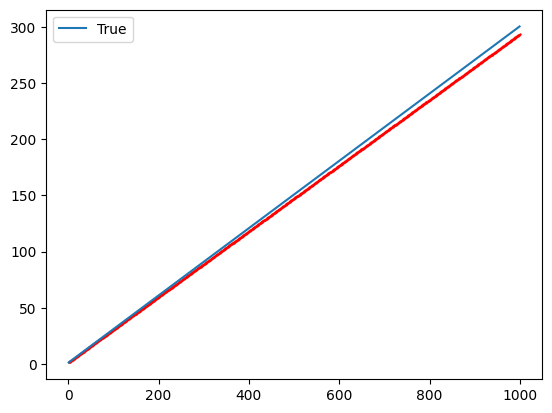

In [68]:
plt.plot(X,y,label="True")
plt.scatter(X_train,y_pred_train,s=0.5,c='r')
plt.scatter(X_test,y_pred_test,s=0.5,c='r')
plt.legend()

In [69]:
torch.save(linear_model.state_dict(),f="models/linear_model.pth")